In [9]:
import tensorflow as tf
print('Tensorflow Version:{}'.format(tf.__version__))

Tensorflow Version:2.0.0


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
#数据结构(train_image, train_lable), (test_image, test_lable)

In [24]:
train_image.shape

(60000, 28, 28)

In [25]:
train_label.shape

(60000,)

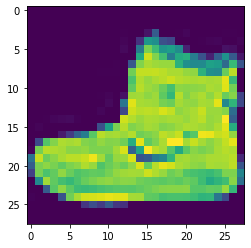

In [26]:
plt.imshow(train_image[0])

In [27]:
np.max(train_image[0])

255

In [29]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
train_image = train_image/255
test_image = test_image/255    #数据归一化

In [32]:
train_image.shape

(60000, 28, 28)

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成28*28的一维向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [38]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']
)

In [39]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4989 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3710 - acc: 0.8668
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3354 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3115 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2937 - acc: 0.8915


In [40]:
model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33389068768024444, 0.8808]

In [42]:
train_label   #数字标记分类时，采用sparse_categorical_crossentropy,二进制向量标记时采用categorical_crossentropy


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [46]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)   #keras中转换为独热编码的方法
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [49]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成28*28的一维向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [51]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']
)

In [55]:
model.fit(train_image, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2798 - acc: 0.8960
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2669 - acc: 0.9010
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2564 - acc: 0.9042
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2465 - acc: 0.9076
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2381 - acc: 0.9096


In [61]:
test_image.shape

(10000, 28, 28)

In [59]:
predict = model.predict(test_image)
predict.shape

(10000, 10)

In [62]:
predict[0]  #对test样本1好的预测值，所有分量和为100%

array([4.0663046e-08, 6.1239045e-09, 3.4255173e-08, 5.9566875e-13,
       3.6728434e-08, 2.4412633e-03, 1.5068720e-08, 2.7176624e-02,
       4.8987636e-09, 9.7038203e-01], dtype=float32)

In [63]:
np.argmax(predict[0]) #最大分量

9

In [64]:
test_label[0]  #测试集的正确答案与预测答案一致

9